In [3]:
%load_ext autoreload
%autoreload 2

import train
import evaluate

In [6]:
params = train.CNNParams(
    embed_size=100,
    dropout=0.5,
    epochs=200,
    filters=[(33, 3), (33, 5), (33, 7)],
    num_layers=1,
    max_norm=3,
)

char_params = train.CharCNNParams(
    dropout=0.5,
    epochs=200,
    max_norm=3,
)

word_results, char_results = evaluate.run(
    params,
    char_params,
    training_sizes=[200, 800, 1600, 2400],
    window_sizes=[(1, 1)],
    k=10,
    kmeans_path="../clustered_data/15",
    num_clusters=15,
    num_clusters_gmm=18,
    use_cluster_cnn=False,
)

  0%|          | 0/10 [00:00<?, ?it/s]

200 training samples, 1132 testing samples


  0%|          | 0/10 [00:00<?, ?it/s]

800 training samples, 1132 testing samples


  0%|          | 0/10 [00:00<?, ?it/s]

1600 training samples, 1132 testing samples


  0%|          | 0/10 [00:00<?, ?it/s]

2400 training samples, 1132 testing samples


100%|██████████| 10/10 [47:38<00:00, 275.12s/it]


In [7]:
df = evaluate.results_to_dataframe(word_results, char_results)

In [1]:
%store -r
#%store df

                                  score                    
                                   mean       std         p
size model    method   window                              
200  TokenCNN Baseline 2       0.896867  0.018039       NaN
              K-Means  2       0.888007  0.019029  0.220668
              GMM      2       0.902115  0.017403  0.361124
     CharCNN  Baseline 2       0.801758  0.013181       NaN
              K-Means  2       0.810543  0.023603  0.247247
              GMM      2       0.817081  0.019151  0.032081
800  TokenCNN Baseline 2       0.911518  0.017853       NaN
              K-Means  2       0.918476  0.011952  0.180168
              GMM      2       0.922998  0.012257  0.040202
     CharCNN  Baseline 2       0.872063  0.026919       NaN
              K-Means  2       0.874940  0.014133  0.682622
              GMM      2       0.884419  0.014278  0.175987
1600 TokenCNN Baseline 2       0.930112  0.011441       NaN
              K-Means  2       0.933170 

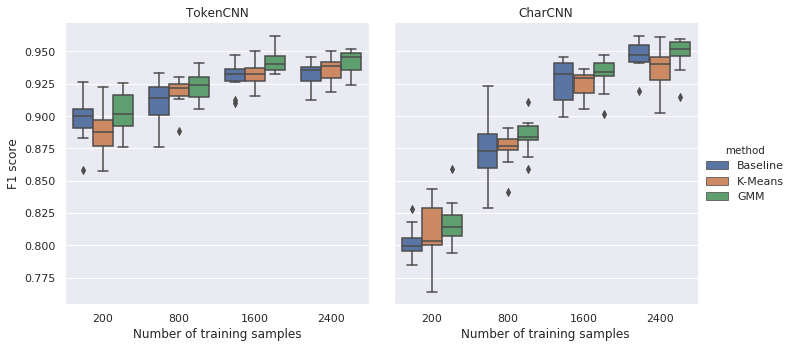

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

def p(s):
    i = s.keys()[0]
    size = df.iloc[i]["size"]
    window = df.iloc[i]["window"]
    method = df.iloc[i]["method"]
    model = df.iloc[i]["model"]

    baseline_scores = df[(df["size"] == size) & (df["model"] == model) & (df["window"] == window) & (df["method"] == "Baseline")].score
    scores = s.tolist()
    return ttest_rel(baseline_scores, scores)[1]

evaluate.plot_sns(df)
print(df.groupby(["size", "model", "method", "window"], sort=False).aggregate([np.mean, np.std, p]))

dir = "concat_window2"
os.makedirs(dir, exist_ok=True)
os.chdir(dir)

try:
    plt.savefig("plot.pdf")
    df.groupby(["size", "model", "method", "window"], sort=False).aggregate([np.mean, np.std, p]).to_latex("table.tex")
except e:
    print(e)
finally:
    os.chdir("..")